In [11]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
data_path = "../data/adam_wobn"
image_path = "./images"
acc_fn = lambda p : max_acc(get_stats(p,"test_stats"))

Max test accuracy of Standard is 82.1% with lr 0.0002
Max test accuracy of Norm is 86.08% with p 1.4
Max test accuracy of CNorm is 84.3% with p 1.4
Max test accuracy of CNormU is 85.61% with p 1.2
Max test accuracy of GCStdU is 85.42% with p 1.2
Max test accuracy of wd is 82.22% with lambda 8e-05


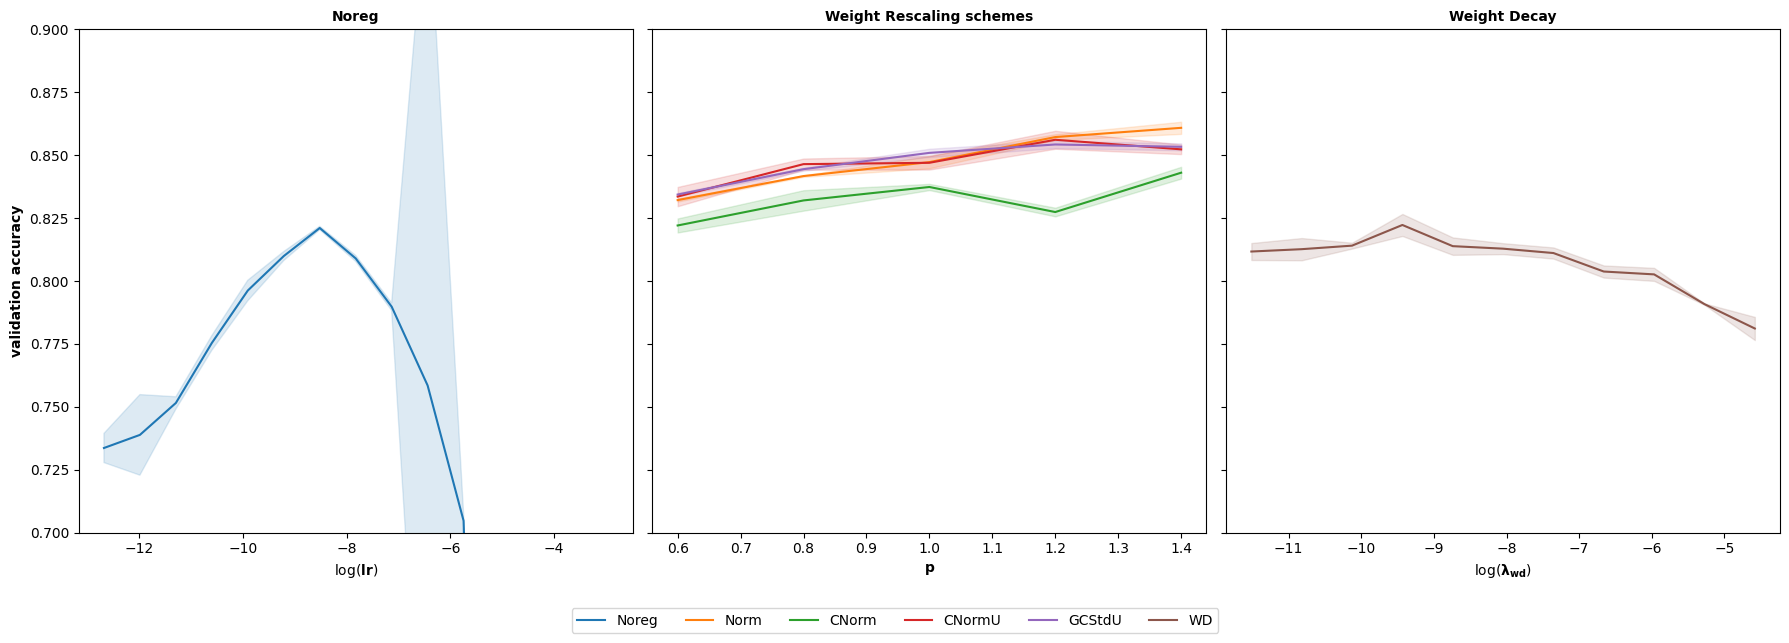

In [ ]:
colors = sns.color_palette("tab10", 6)
fig,axs = plt.subplots(ncols=3,nrows=1,sharey="row")

x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/noreg"),
                          lambda js : np.log(js["optimizer"]["lr"]), 
                          acc_fn,
                          axs[0], 
                          norm=False,
                          label="Noreg",
                          color=colors[0],
                          alpha=0.15)
print("Max test accuracy of Standard is {0}% with lr {1}".format(round(100*y.max(),2),round(np.exp(x[y.argmax()]),6)))


for i,exp in enumerate(["Norm","CNorm","CNormU","GCStdU"]):

    x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp.lower()}"),
                              lambda js: js["norm"]["norm_multiply"],
                              acc_fn, 
                              axs[1], 
                              norm=False, 
                              label=exp,
                              color=colors[i+1],
                              alpha=0.15)
    print("Max test accuracy of {0} is {1}% with p {2}".format(exp,round(100*y.max(),2),x[y.argmax()]))

x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/wd"),
                          lambda js : np.log(js["optimizer"]["lambda_wd"]),
                          acc_fn,
                          axs[2], 
                          norm=False,
                          label="WD",
                          color=colors[5],
                        alpha=0.15)
print("Max test accuracy of wd is {0}% with lambda {1}".format(round(100*y.max(),2),np.exp(x[y.argmax()])))

axs[0].set_ylim(0.7,0.9)

lines_ax0, labels_ax0 = axs[0].get_legend_handles_labels()
lines_ax1, labels_ax1 = axs[1].get_legend_handles_labels()
lines_ax2, labels_ax2 = axs[2].get_legend_handles_labels()
fig.legend(chain(lines_ax0,lines_ax1,lines_ax2), chain(labels_ax0,labels_ax1,labels_ax2), loc='lower center', ncol=6, bbox_to_anchor=(0.5,-0.075), bbox_transform=fig.transFigure)


axs[0].set_ylabel("max. validation accuracy",font={'weight' : 'bold'})
axs[0].set_xlabel(r"$\mathbf{\text{log} \left( lr \right)}$",font={'weight' : 'bold'})
axs[1].set_xlabel(r"$\mathbf{p}$",font={'weight' : 'bold'})
axs[2].set_xlabel(r"$\mathbf{\text{log} \left( \lambda_{wd} \right)}$",font={'weight' : 'bold'})

axs[0].set_title("Noreg",font={'weight' : 'bold'})
axs[1].set_title("Weight Rescaling schemes",font={'weight' : 'bold'})
axs[2].set_title("Weight Decay",font={'weight' : 'bold'})

fig.set_size_inches(18,6)
fig.tight_layout()

fig.savefig(f"{image_path}/hyperparameters_max_validation_accuracy.png", bbox_inches='tight',dpi=300)

In [4]:
exps = ["noreg/0.0002","norm/1.4_1","cnorm/1.4_1","cnormu/1.2_1","gcstdu/1.4_1","wd/8e-05"]
labels = [r"Noreg $lr = 0.0002$", r"Norm $p=1.4$", r"CNorm $p=1.4$", r"CNormU $p=1.2$", r"GCstdU $p=1.4$",r"WD $\lambda_{wd}=8e^{-5}$"]
colors = dict(zip(labels, sns.color_palette("tab10", len(labels))))


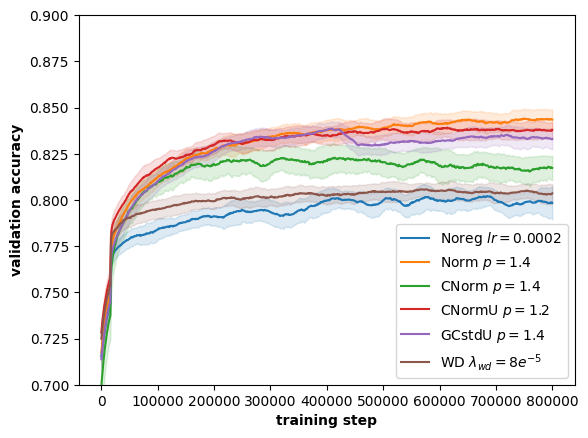

In [7]:
for exp,label in zip(exps,labels):
    plot_step_stat(get_stats(f"{data_path}/{exp}","test_stats")["acc"],plt,label=label,smoothing=16,color=colors[label],alpha=0.15)

plt.gca().set_ylim(0.7,0.9)
plt.legend()
plt.gca().set_ylabel("validation accuracy",font={'weight' : 'bold'})
plt.gca().set_xlabel("training step",font={'weight' : 'bold'})
plt.gcf().savefig(f"{image_path}/best_hyperparameters_validation_accuracy.png", bbox_inches='tight',dpi=300)

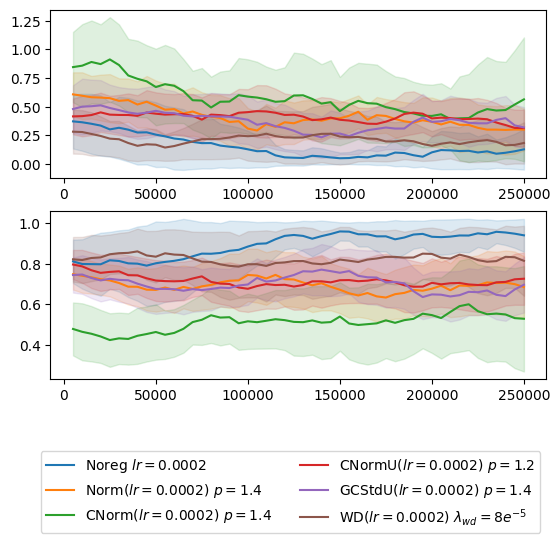

In [13]:
fig,axs = distribution_drift(data_path,["noreg/0.0002","norm/1.4_1","cnorm/1.4_1","cnormu/1.2_1","gcstdu/1.4_1","wd/8e-05"],
                             [r"Noreg $lr=0.0002$","Norm($lr=0.0002$) $p=1.4$","CNorm($lr=0.0002$) $p=1.4$","CNormU($lr=0.0002$) $p=1.2$","GCStdU($lr=0.0002$) $p=1.4$",r"WD($lr=0.0002$) $\lambda_{wd}=8e^{-5}$"],
                             [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["wd"]])

fig.set_size_inches(6,4)
fig.tight_layout()

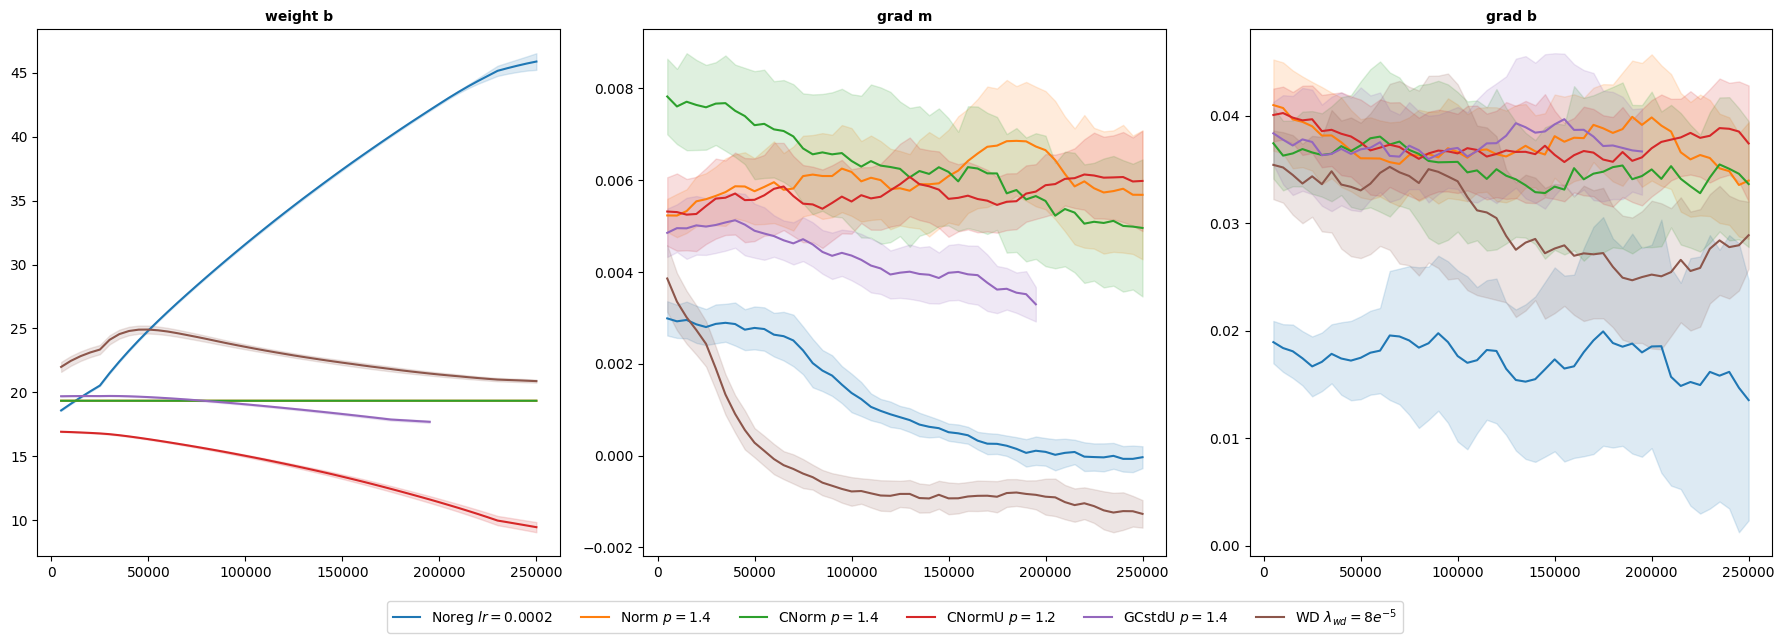

In [9]:
exps = ["noreg/0.0002","norm/1.4_1","cnorm/1.4_1","cnormu/1.2_1","gcstdu/1.4_1","wd/8e-05"]
labels = [r"Noreg $lr = 0.0002$", r"Norm $p=1.4$",r"CNorm $p=1.4$", r"CNormU $p=1.2$", r"GCstdU $p=1.4$",r"WD $\lambda_{wd}=8e^{-5}$"]
colors = dict(zip(labels, sns.color_palette("tab10", len(labels))))

fig,axs = mg_spacing(data_path,exps,labels,colors,"mg_spacing_0")

KeyboardInterrupt: 

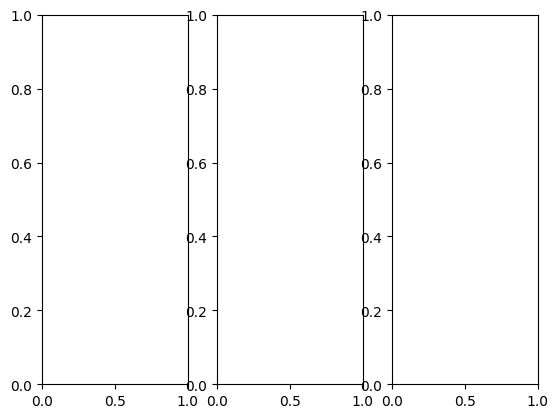

In [4]:
exps = ["noreg/0.0002","cnorm/1.4_1","cnormu/1.2_1","gcstdu/1.4_1","wd/8e-05"]
labels = [r"Noreg $lr = 0.0002$", r"CNorm $p=1.4$", r"CNormU $p=1.2$", r"GCstdU $p=1.4$",r"WD $\lambda_{wd}=8e^{-5}$"]
colors = dict(zip(labels, sns.color_palette("tab10", len(labels))))

fig,axs = mg_spacing_and_bar_plot(data_path,exps,labels,colors,"mg_spacing_0","updates")

#fig.savefig(f"{image_path}/mb_of_mg_spacing_0_100000_and_validation_accuracy_barplot.png", bbox_inches='tight',dpi=300)